In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('data/Mall_Customers.csv', index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Buscando valores nulos o duplicados

In [32]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

### Visualizando Outliers

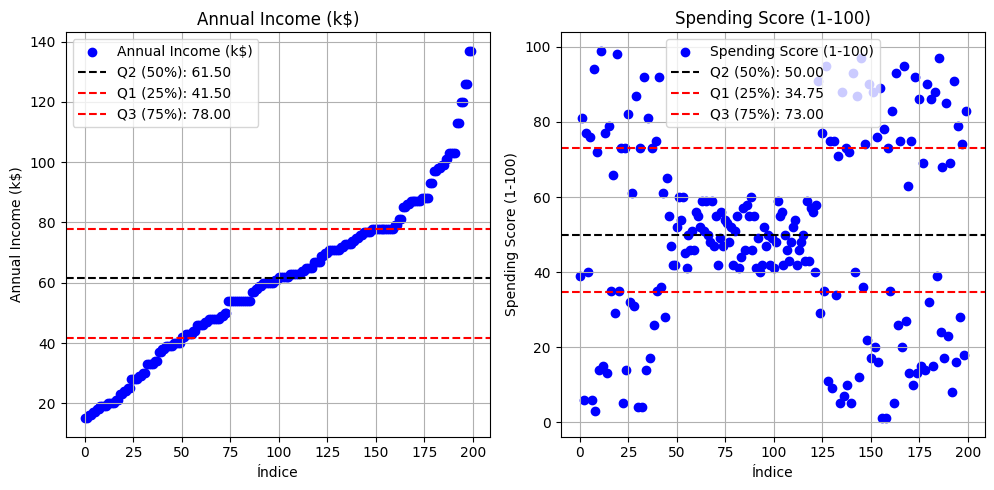

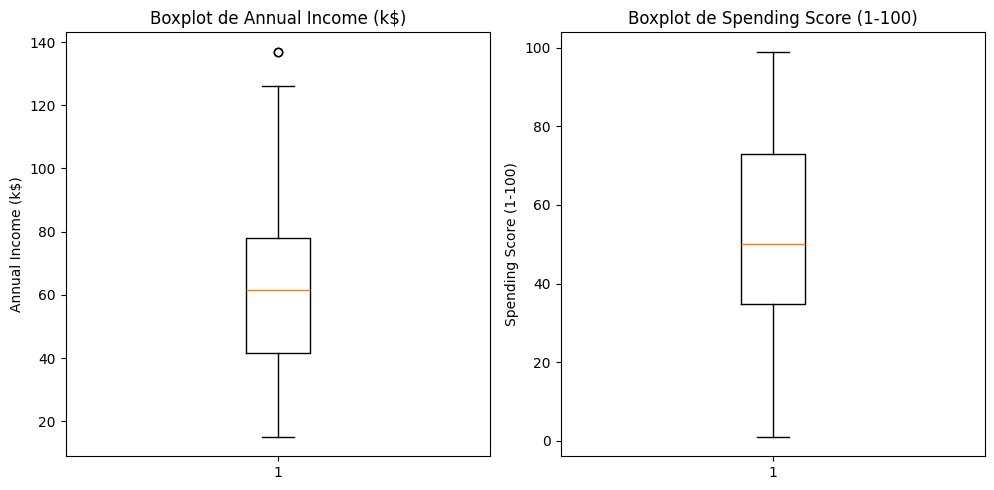

In [ ]:
cols = ['Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    qs = df[col].quantile([0.25, 0.5, 0.75]).values
    q1 = qs[0]  # 25%
    q2 = qs[1]  # 50% (mediana)
    q3 = qs[2]  # 75%

    plt.scatter(range(len(df)), df[col], color='blue', label=f'{col}')
    
    # Líneas horizontales para los cuartiles
    plt.axhline(y=q2, color='black', linestyle='--', label=f'Q2 (50%): {q2:.2f}')
    plt.axhline(y=q1, color='red', linestyle='--', label=f'Q1 (25%): {q1:.2f}')
    plt.axhline(y=q3, color='red', linestyle='--', label=f'Q3 (75%): {q3:.2f}')
    

    plt.xlabel('Índice')
    plt.ylabel(col)
    plt.title(f'{col}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [36]:
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
datos_normalizados = pd.DataFrame(datos_normalizados, columns=df[['Annual Income (k$)', 'Spending Score (1-100)']].columns)

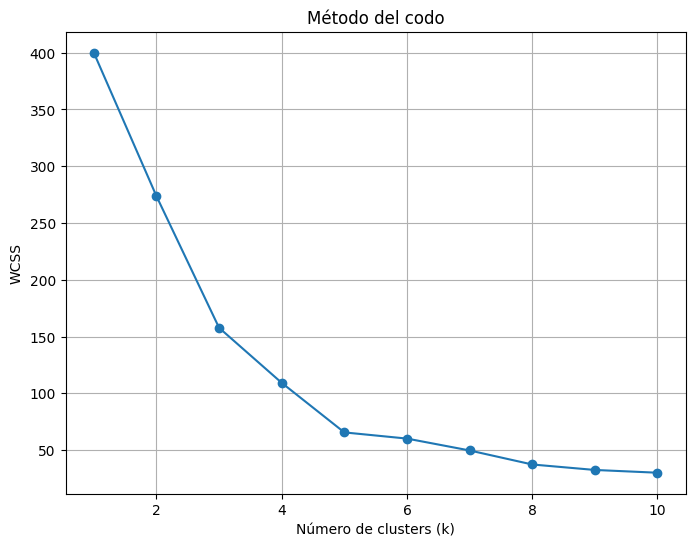

In [45]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(datos_normalizados)
    WCSS.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del codo')
plt.grid(True)
plt.show()


In [38]:
k_optimo = 5  # Ajustar según el codo
kmeans_final = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42)
kmeans_final.fit(datos_normalizados)

KMeans(n_clusters=5, random_state=42)

In [39]:
df['Cluster'] = kmeans_final.labels_
print(df.head())

            Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
CustomerID                                                                  
1             Male   19                  15                      39        4
2             Male   21                  15                      81        2
3           Female   20                  16                       6        4
4           Female   23                  16                      77        2
5           Female   31                  17                      40        4


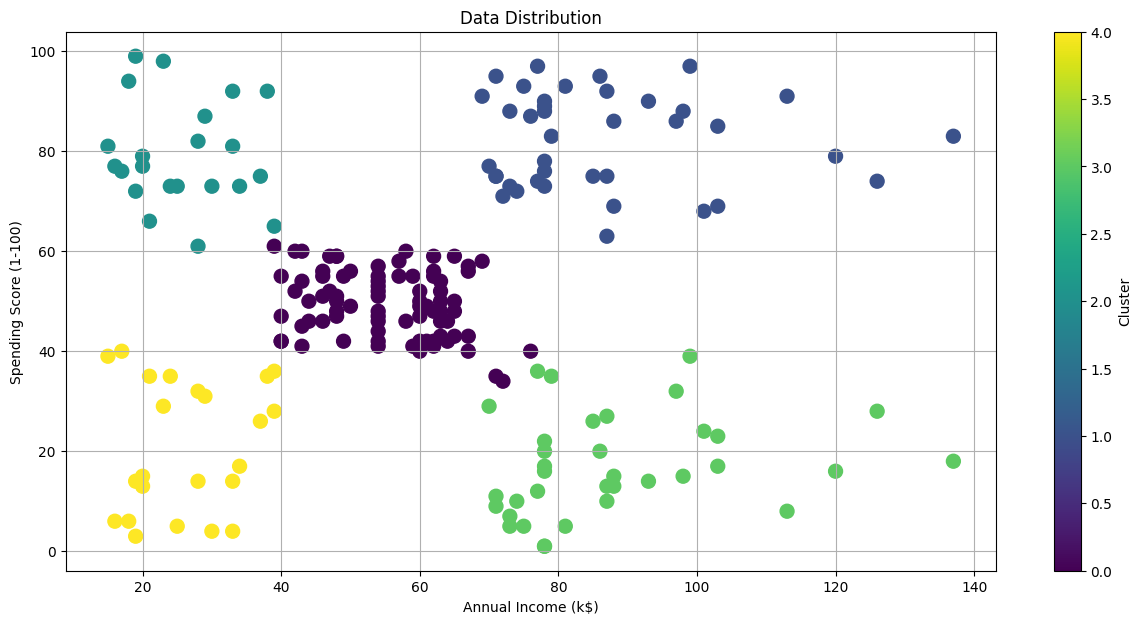

In [42]:
plt.figure(figsize=(15, 7))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Data Distribution')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

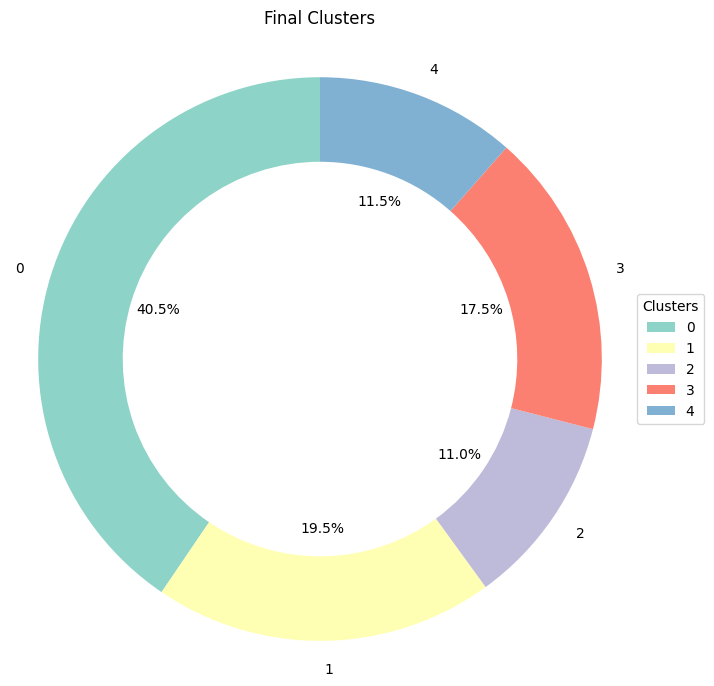

In [ ]:
cluster_counts = df["Cluster"].value_counts().sort_index()

plt.figure(figsize=(8, 8)) 
wedges, texts, autotexts = plt.pie(cluster_counts.values, 
                                   labels=cluster_counts.index,
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   wedgeprops=dict(width=0.3),  
                                   colors=plt.cm.Set3(range(len(cluster_counts)))  
                                  )

plt.title('Final Clusters', pad=20)
plt.legend(wedges, cluster_counts.index, title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
# Mostrar el gráfico
plt.show()